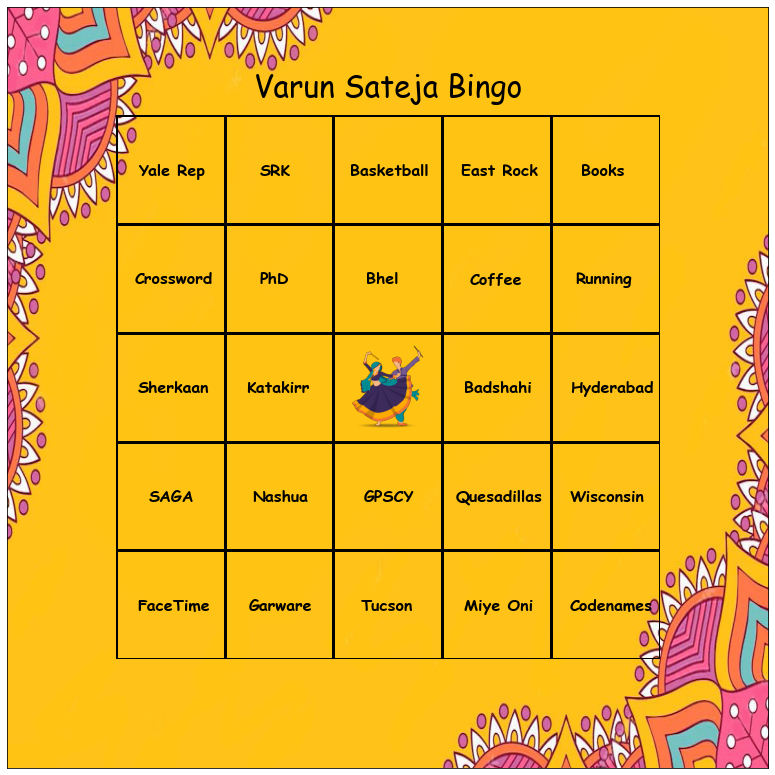

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import random
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

words = np.array([])
rowlen = 5
with open("Bingo words - Sheet1.csv") as f:
    wr = csv.reader(f,quoting=csv.QUOTE_ALL)
    i=0
    for line in wr:
        if i == 0:
            i+=1
            continue
        words = np.append(words,line[0])


fig,ax = plt.subplots(figsize=(14,14))

garba = plt.imread('garba.png')

mehendi = plt.imread("mehendi-modified.png")
ax.imshow(mehendi[100:-100,100:-100,:],extent=[-1,6,-1,6])
ax.imshow(garba,extent=[2,3,2,3])
plt.xlim(-1,6)
plt.ylim(-1,6)

ax.tick_params(axis='both',bottom=False,top=False,left=False,right=False,labelbottom=False,labelleft=False)
ax.set_xticks(np.arange(0, rowlen + 1))
ax.set_yticks(np.arange(0, rowlen + 1))
rect = plt.Rectangle((0,0),5,5,color='none')
ax.add_patch(rect)
ax.grid(which='both',alpha=1,linewidth=3,color='black',clip_path=rect)

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_title('Varun Sateja Bingo',color='black',y=1.0,pad=-90,fontsize=30,font='cursive')

for count in range(1,2):
    if count==1:
        np.random.shuffle(words)
        words = np.insert(words,12,' ')
    else:
        words = np.delete(words,12)
        np.random.shuffle(words)
        words = np.insert(words,12,' ')
    for i, word in enumerate(words[:rowlen**2]):
        x = (i % rowlen) + 0.4 - len(word)/len(words)
        y = int(i / rowlen) + 0.45
        if i==12:
            x = (i % rowlen) + 0.35 - len(word)/len(words)
            y = int(i / rowlen) + 0.42
            ax.annotate(word, xy=(x, y), xytext=(x, y),font='cursive',fontsize=24,weight='bold')
        else:
            ax.annotate(word, xy=(x, y), xytext=(x, y),font='cursive',fontsize=16,weight='bold')

    plt.savefig('Bingo_trial.jpg',bbox_inches='tight')
    plt.show()

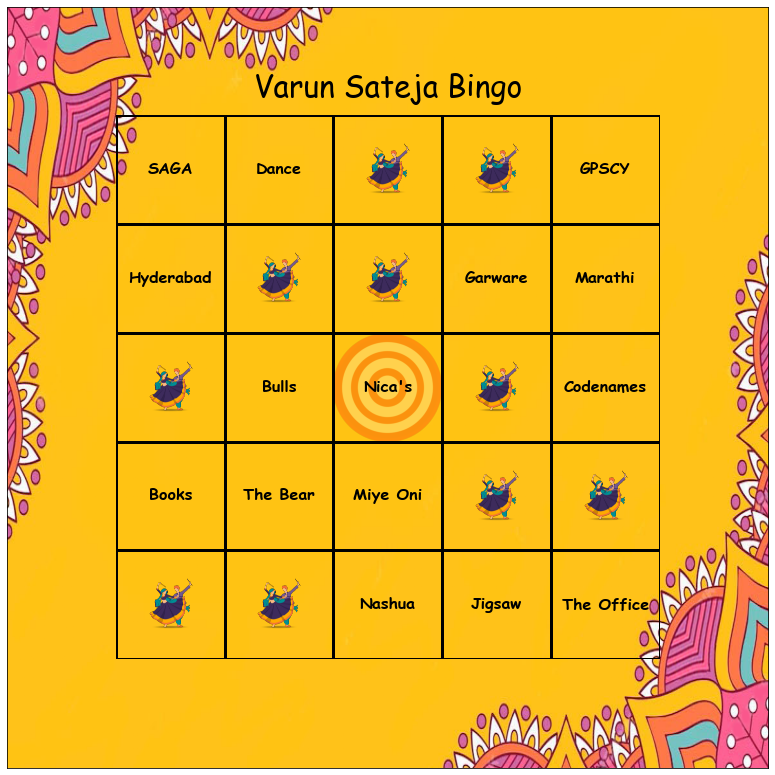

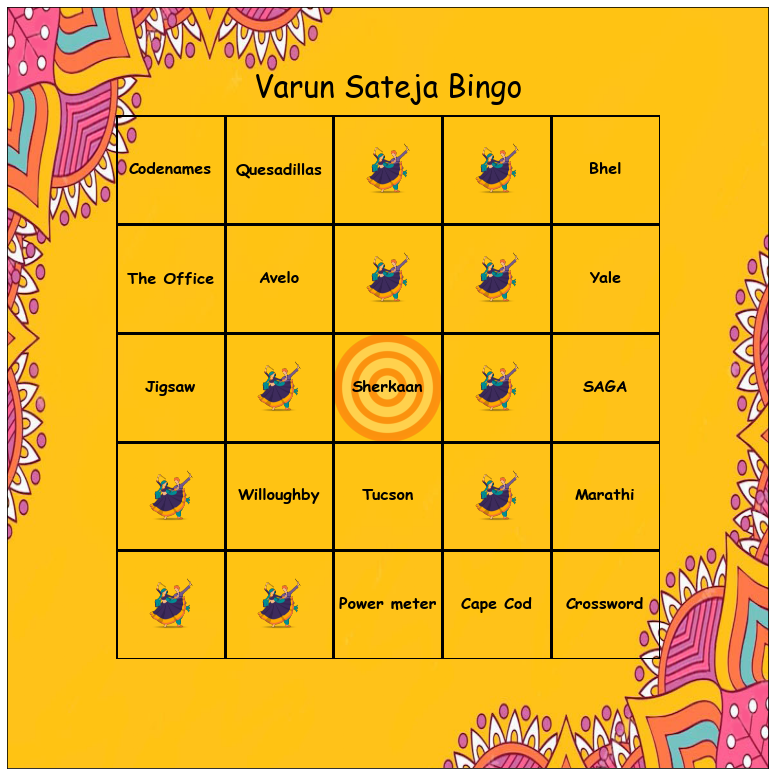

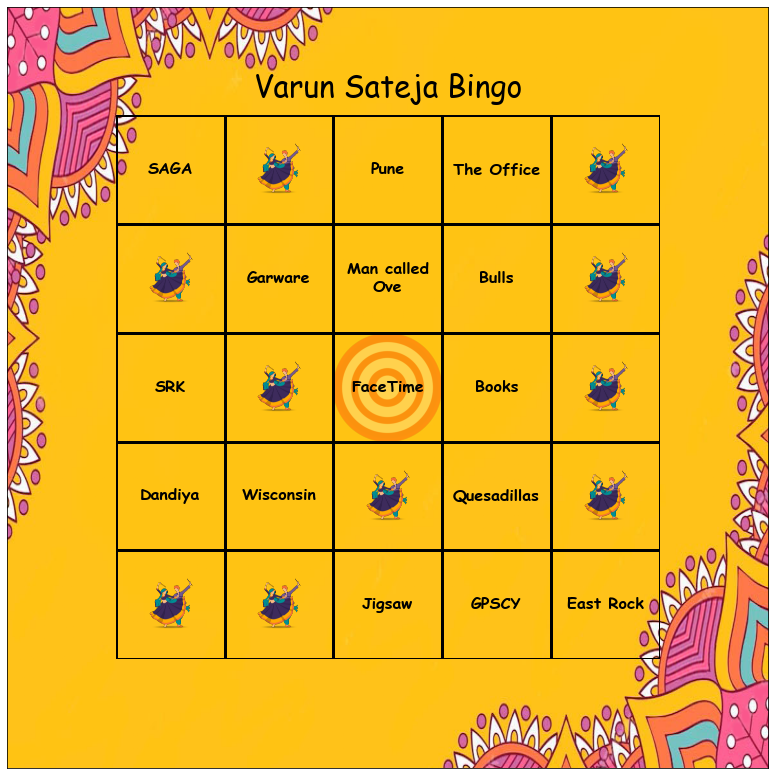

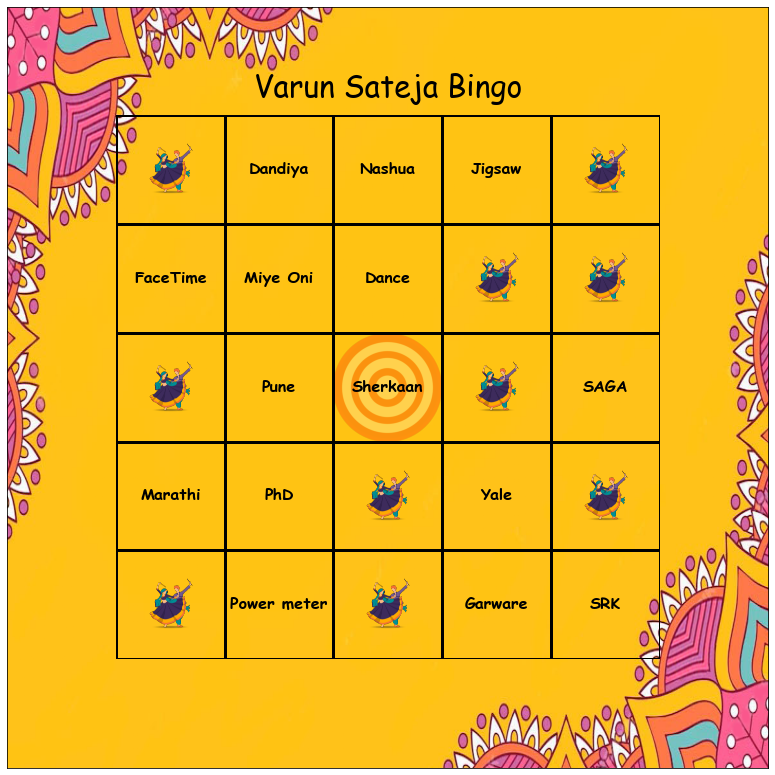

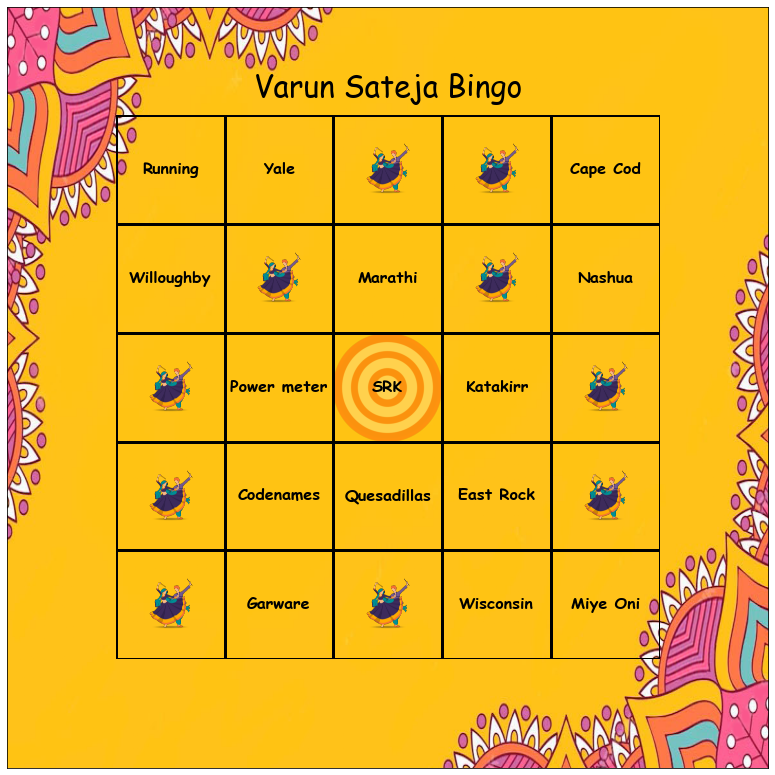

In [41]:
words = np.array([])
rowlen = 5
with open("Bingo words - Sheet1.csv") as f:
    wr = csv.reader(f,quoting=csv.QUOTE_ALL)
    i=0
    for line in wr:
        if i == 0:
            i+=1
            continue
        words = np.append(words,line[0])

text_kwargs = dict(ha='center', va='center', fontsize=16)

garba = plt.imread('garba.png')
mehendi = plt.imread("mehendi-modified.png")
bullseye = plt.imread("bullseye.png")

for count in range(1,6):
    fig,ax = plt.subplots(figsize=(14,14))
    ax.imshow(mehendi[100:-100,100:-100,:],extent=[-1,6,-1,6])

    ax.tick_params(axis='both',bottom=False,top=False,left=False,right=False,labelbottom=False,labelleft=False)
    ax.set_xticks(np.arange(0, rowlen + 1))
    ax.set_yticks(np.arange(0, rowlen + 1))
    rect = plt.Rectangle((0,0),5,5,color='none')
    ax.add_patch(rect)
    ax.grid(which='both',alpha=1,linewidth=3,color='black',clip_path=rect)

    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_title('Varun Sateja Bingo',color='black',y=1.0,pad=-90,fontsize=30,font='cursive')
    
    random_indices = np.array([],dtype=int)
    curr_words = words.copy()
    np.random.shuffle(curr_words)
    
    for j in range(0,rowlen):
        if j==2:
            random_indices = np.append(random_indices,random.sample([10,11,13,14],2))
        else:
            random_indices = np.append(random_indices,random.sample(range(5*j,5*j+5),2))
    curr_words[random_indices] = ' '
    
    for i, word in enumerate(curr_words[:rowlen**2]):
        x = (i % rowlen) + 0.5
        y = int(i / rowlen) + 0.5
        if word==' ':
            ax.imshow(garba,extent=[x-0.3,x+0.3,y-0.3,y+0.3],alpha=1)
            # ax.annotate(curr_word, xy=(x, y), xytext=(x, y),font='cursive',**text_kwargs,weight='bold')
        else:
            if len(word)>=12:
                temp = word.split(' ')
                word = temp[0] + ' ' + temp[1] + '\n' + temp[2]
                ax.annotate(word, xy=(x, y), xytext=(x, y),font='cursive',**text_kwargs,weight='bold')
            else:
                ax.annotate(word, xy=(x, y), xytext=(x, y),font='cursive',**text_kwargs,weight='bold')
            if i==12:
                # ax.annotate(word, xy=(x, y), xytext=(x, y),font='cursive',**text_kwargs,weight='bold',color='red')
                ax.imshow(bullseye,extent=[x-0.5,x+0.5,y-0.5,y+0.5],alpha=.25)

    plt.xlim(-1,6)
    plt.ylim(-1,6)
    plt.savefig('Bingo_trial_'+str(count)+'.jpg',bbox_inches='tight')
    # plt.show()